In [12]:
!pip install pyreadstat


In [14]:
import sys
!{sys.executable} -m pip install pyreadstat



  Using cached narwhals-2.10.2-py3-none-any.whl.metadata (11 kB)
   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
   - -------------------------------------- 0.1/2.4 MB 812.7 kB/s eta 0:00:03
   -------- ------------------------------- 0.5/2.4 MB 4.5 MB/s eta 0:00:01
   ----------------------------------- ---- 2.2/2.4 MB 13.7 MB/s eta 0:00:01
   ---------------------------------------- 2.4/2.4 MB 11.9 MB/s eta 0:00:00
Using cached narwhals-2.10.2-py3-none-any.whl (419 kB)


In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import KFold, cross_val_score

fotbal_path = r"C:\Users\gary_\Downloads\gcd15_act1\gcd15_act1_fotbal.sav"
credit_path = r"C:\Users\gary_\Downloads\gcd15_act1\gcd15_act1_ej5tarea5.sav"

# Cargar .sav con pyreadstat
fotbal_df, fotbal_meta = pyreadstat.read_sav(fotbal_path)
credit_df, credit_meta = pyreadstat.read_sav(credit_path)

print("Fotbal cols:", list(fotbal_df.columns))
print("Credit cols:", list(credit_df.columns))
display(fotbal_df.head())
display(credit_df.head())

fotbal_df.head(), credit_df.head(), fotbal_df.shape, credit_df.shape

Fotbal cols: ['y', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9']
Credit cols: ['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt', 'othdebt', 'default', 'ZRE_1']


,y,x1,x2,x3,x4,x5,x6,x7,x8,x9
0,10.0,2113.0,1985.0,38.9,64.7,4.0,868.0,59.7,2205.0,1917.0
1,11.0,2003.0,2855.0,38.8,61.3,3.0,615.0,55.0,2096.0,1575.0
2,11.0,2957.0,1737.0,40.1,60.0,14.0,914.0,65.6,1847.0,2175.0
3,13.0,2285.0,2905.0,41.6,45.3,-4.0,957.0,61.4,1903.0,2476.0
4,10.0,2971.0,1666.0,39.2,53.8,15.0,836.0,66.1,1457.0,1866.0


,age,ed,employ,address,income,debtinc,creddebt,othdebt,default,ZRE_1
0,41.0,3.0,17.0,12.0,176.0,9.3,11.359392,5.008608,1.0,0.486847
1,27.0,1.0,10.0,6.0,31.0,17.3,1.362202,4.000798,0.0,-0.497338
2,40.0,1.0,15.0,14.0,55.0,5.5,0.856075,2.168925,0.0,-0.100687
3,41.0,1.0,15.0,14.0,120.0,2.9,2.658720,0.821280,0.0,-0.150464
4,24.0,2.0,2.0,0.0,28.0,17.3,1.787436,3.056564,1.0,0.528626


(      y      x1      x2    x3    x4    x5     x6    x7      x8      x9
 0  10.0  2113.0  1985.0  38.9  64.7   4.0  868.0  59.7  2205.0  1917.0
 1  11.0  2003.0  2855.0  38.8  61.3   3.0  615.0  55.0  2096.0  1575.0
 2  11.0  2957.0  1737.0  40.1  60.0  14.0  914.0  65.6  1847.0  2175.0
 3  13.0  2285.0  2905.0  41.6  45.3  -4.0  957.0  61.4  1903.0  2476.0
 4  10.0  2971.0  1666.0  39.2  53.8  15.0  836.0  66.1  1457.0  1866.0,
     age   ed  employ  address  income  debtinc   creddebt   othdebt  default  \
 0  41.0  3.0    17.0     12.0   176.0      9.3  11.359392  5.008608      1.0   
 1  27.0  1.0    10.0      6.0    31.0     17.3   1.362202  4.000798      0.0   
 2  40.0  1.0    15.0     14.0    55.0      5.5   0.856075  2.168925      0.0   
 3  41.0  1.0    15.0     14.0   120.0      2.9   2.658720  0.821280      0.0   
 4  24.0  2.0     2.0      0.0    28.0     17.3   1.787436  3.056564      1.0   
 
       ZRE_1  
 0  0.486847  
 1 -0.497338  
 2 -0.100687  
 3 -0.150464  
 4  

In [93]:
fotbal_df.info()
fotbal_df.describe()

credit_df.info()
credit_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       28 non-null     float64
 1   x1      28 non-null     float64
 2   x2      28 non-null     float64
 3   x3      28 non-null     float64
 4   x4      28 non-null     float64
 5   x5      28 non-null     float64
 6   x6      28 non-null     float64
 7   x7      28 non-null     float64
 8   x8      28 non-null     float64
 9   x9      28 non-null     float64
dtypes: float64(10)
memory usage: 2.3 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       700 non-null    float64
 1   ed        700 non-null    float64
 2   employ    700 non-null    float64
 3   address   700 non-null    float64
 4   income    700 non-null    float64
 5   debtinc   700 non-null    flo

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default,ZRE_1
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,34.860000,1.722857,8.388571,8.278571,45.601429,10.260571,1.553553,3.058209,0.261429,-0.000054
std,7.997342,0.928206,6.658039,6.824877,36.814226,6.827234,2.117197,3.287555,0.439727,0.975940
min,20.000000,1.000000,0.000000,0.000000,14.000000,0.400000,0.011696,0.045584,0.000000,-4.361356
25%,29.000000,1.000000,3.000000,3.000000,24.000000,5.000000,0.369059,1.044178,0.000000,-0.476062
50%,34.000000,1.000000,7.000000,7.000000,34.000000,8.600000,0.854869,1.987568,0.000000,-0.222684
75%,40.000000,2.000000,12.000000,12.000000,55.000000,14.125000,1.901955,3.923065,1.000000,0.184133
max,56.000000,5.000000,31.000000,34.000000,446.000000,41.300000,20.561310,27.033600,1.000000,7.547690


In [94]:
fotbal_df.isnull().sum()

y     0
x1    0
x2    0
x3    0
x4    0
x5    0
x6    0
x7    0
x8    0
x9    0
dtype: int64

In [95]:
credit_df.isnull().sum()

age         0
ed          0
employ      0
address     0
income      0
debtinc     0
creddebt    0
othdebt     0
default     0
ZRE_1       0
dtype: int64

In [96]:
fotbal_df.columns


Index(['y', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9'], dtype='object')

In [97]:
credit_df.columns

Index(['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt', 'default', 'ZRE_1'],
      dtype='object')

In [78]:
rename_map = {
    "y":  "Games_won",
    "x1": "Rushing_yards",
    "x2": "Passing_yards",
    "x3": "Punting_avg",
    "x4": "Field_goal_pct",
    "x5": "Turnover_diff",
    "x6": "Penalty_yards",
    "x7": "Percent_rushing",
    "x8": "Opp_rushing_yards",
    "x9": "Opp_passing_yards",
}
fotbal_df = fotbal_df.rename(columns=rename_map)
fotbal_df["Games_won"].describe()


count    28.000000
mean      6.964286
std       3.479912
min       0.000000
25%       4.000000
50%       6.500000
75%      10.000000
max      13.000000
Name: Games_won, dtype: float64

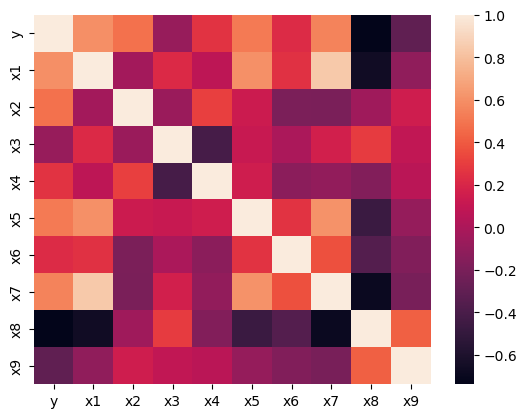

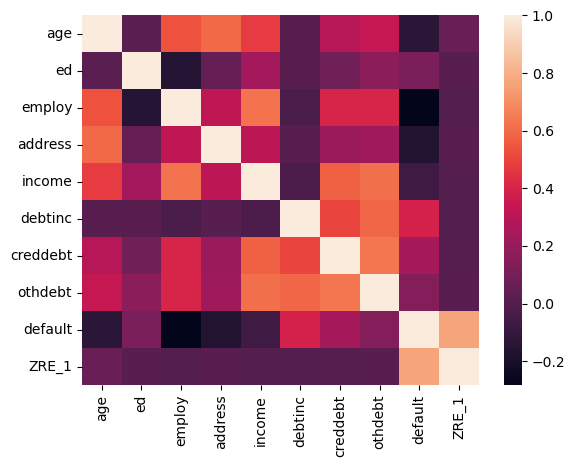

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(fotbal_df.corr(), annot=False)
plt.show()

sns.heatmap(credit_df.corr(), annot=False)
plt.show()


In [101]:
fotbal_df["y"].describe()
fotbal_df.columns


Index(['y', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9'], dtype='object')

Fuciones de apoyo - Metricas

In [111]:
import matplotlib.pyplot as plt
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score,
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix
)

def print_regression_report(y_true, y_pred, nombre="Modelo"):
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    mae  = mean_absolute_error(y_true, y_pred)
    r2   = r2_score(y_true, y_pred)
    print(f"\n[{nombre}]  RMSE={rmse:.4f}  MAE={mae:.4f}  R2={r2:.4f}")
    return {"RMSE":rmse, "MAE":mae, "R2":r2}

def print_classif_report(y_true, y_prob, thresh=0.5, nombre="Modelo"):
    y_pred = (y_prob >= thresh).astype(int)
    acc  = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec  = recall_score(y_true, y_pred, zero_division=0)
    f1   = f1_score(y_true, y_pred, zero_division=0)
    auc  = roc_auc_score(y_true, y_prob)
    cm   = confusion_matrix(y_true, y_pred)
    print(f"\n[{nombre}]  ACC={acc:.3f}  PREC={prec:.3f}  REC={rec:.3f}  F1={f1:.3f}  AUC={auc:.3f}")
    print(f"[{nombre}]  Matriz de confusión:\n{cm}")
    return {"ACC":acc, "PREC":prec, "REC":rec, "F1":f1, "AUC":auc, "CM":cm}


MODELO 1: REGRESIÓN — Datos de Fútbol Americano

In [112]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score

# Asegurar tipos numéricos
fotbal = fotbal_df.copy()
X_simple = fotbal[["x2","x7","x8"]].astype(float)
y = fotbal["y"].astype(float)

# Entrenar
lin = LinearRegression()
lin.fit(X_simple, y)
y_hat = lin.predict(X_simple)

# Métricas (en muestra)
res_simple = print_regression_report(y, y_hat, "Regresión (y ~ x2+x7+x8)")
print("Coeficientes:", dict(zip(["x2","x7","x8"], lin.coef_)))
print("Intercepto:", lin.intercept_)

# Validación cruzada (R^2)
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_r2 = cross_val_score(lin, X_simple, y, cv=cv, scoring="r2")
print(f"R^2 CV (5-fold): media={cv_r2.mean():.4f}  ±{cv_r2.std():.4f}")



[Regresión (y ~ x2+x7+x8)]  RMSE=1.5797  MAE=1.2122  R2=0.7863
Coeficientes: {'x2': 0.0035980702139767075, 'x7': 0.1939602095832247, 'x8': -0.0048154939700503895}
Intercepto: -1.808372058705232
R^2 CV (5-fold): media=0.4946  ±0.1948


Grafico de Residuos

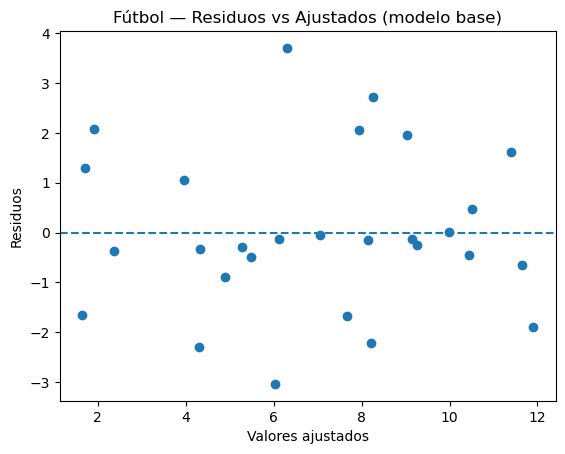

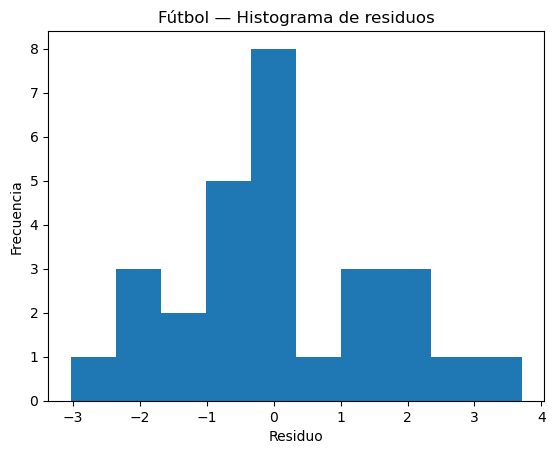

In [113]:
residuos = y - y_hat

# Residuos vs ajustados
plt.figure()
plt.scatter(y_hat, residuos)
plt.axhline(0, linestyle="--")
plt.xlabel("Valores ajustados")
plt.ylabel("Residuos")
plt.title("Fútbol — Residuos vs Ajustados (modelo base)")
plt.show()

# Histograma de residuos
plt.figure()
plt.hist(residuos, bins=10)
plt.xlabel("Residuo")
plt.ylabel("Frecuencia")
plt.title("Fútbol — Histograma de residuos")
plt.show()


3. Gráficos de residuos

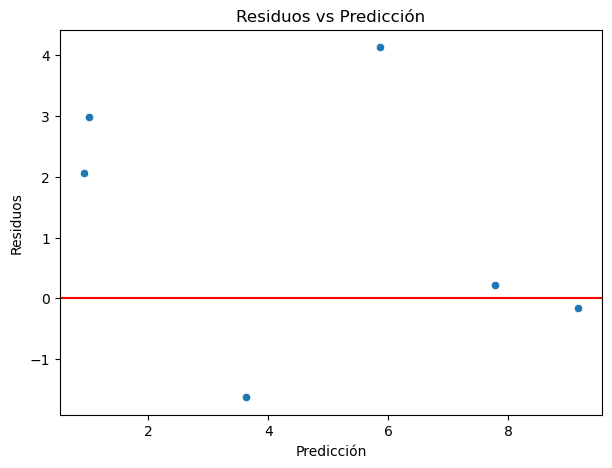

In [30]:
residuals = y_test - y_pred

plt.figure(figsize=(7,5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color="red")
plt.xlabel("Predicción")
plt.ylabel("Residuos")
plt.title("Residuos vs Predicción")
plt.show()


4. Predicción solicitada (x2 = 2300, x7 = 56, x8 = 2100)

Predicción de juegos ganados: 7.216


C:\Users\gary_\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


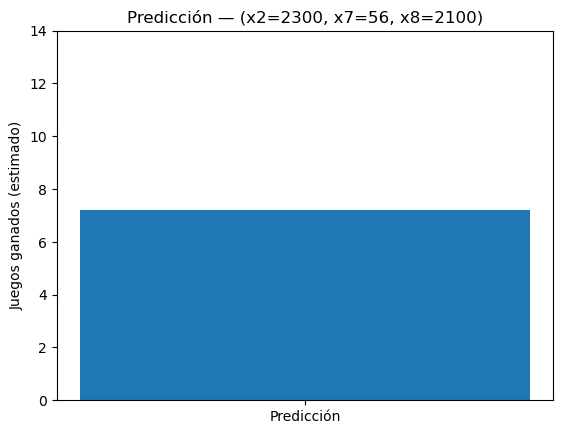

In [105]:
import numpy as np

X_new = np.array([[2300, 56, 2100]])
pred_new = lin.predict(X_new)[0]
print(f"Predicción de juegos ganados: {pred_new:.3f}")

# Gráfica simple de la predicción
plt.figure()
plt.bar(["Predicción"], [pred_new])
plt.ylabel("Juegos ganados (estimado)")
plt.title("Predicción — (x2=2300, x7=56, x8=2100)")
plt.ylim(0, max(14, pred_new + 2))
plt.show()



5. Selección de variables (usando Lasso)

In [106]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV

X_all = fotbal[[f"x{i}" for i in range(1,10)]].astype(float)

lasso = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LassoCV(cv=5, random_state=42))
])
lasso.fit(X_all, y)
y_hat_lasso = lasso.predict(X_all)

# Métricas Lasso
res_lasso = print_regression_report(y, y_hat_lasso, "Lasso (x1..x9)")
coef = lasso.named_steps["model"].coef_
vars_sel = [f"x{i+1}" for i, c in enumerate(coef) if abs(c) > 1e-8]
print("Variables seleccionadas por Lasso:", vars_sel)

# CV R^2 para Lasso
cv_r2_lasso = cross_val_score(lasso, X_all, y, cv=cv, scoring="r2")
print(f"R^2 CV Lasso (5-fold): media={cv_r2_lasso.mean():.4f}  ±{cv_r2_lasso.std():.4f}")




[Lasso (x1..x9)]  RMSE=1.4906  MAE=1.1270  R2=0.8097
Variables seleccionadas por Lasso: ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9']
R^2 CV Lasso (5-fold): media=0.1360  ±0.3690


MODELO 2: Regresión Logística

Preparación, split y modelos (logística estándar y con L1)

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

credit = credit_df.copy()
# Quitar variables auxiliares si existieran
for col_bad in ["ZRE_1"]:
    if col_bad in credit.columns:
        credit = credit.drop(columns=[col_bad])

X = credit.drop(columns=["default"]).astype(float)
y = credit["default"].astype(int)

X_tr, X_te, y_tr, y_te = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# Pipeline con estandarización y clase balanceada
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

logit_std = Pipeline([
    ("scaler", StandardScaler()),
    ("logit", LogisticRegression(max_iter=500, class_weight="balanced", random_state=42))
])
logit_std.fit(X_tr, y_tr)

logit_l1 = Pipeline([
    ("scaler", StandardScaler()),
    ("logit", LogisticRegression(penalty="l1", solver="liblinear",
                                 max_iter=600, class_weight="balanced",
                                 random_state=42))
])
logit_l1.fit(X_tr, y_tr)



Pipeline(steps=[('scaler', StandardScaler()),
                ('logit',
                 LogisticRegression(class_weight='balanced', max_iter=600,
                                    penalty='l1', random_state=42,
                                    solver='liblinear'))])

Métricas explicativas (toda la muestra) y predictivas (train/test)

In [108]:
# EXPLICATIVO: usar TODA la muestra para entrenar y medir
logit_expl = Pipeline([
    ("scaler", StandardScaler()),
    ("logit", LogisticRegression(max_iter=500, class_weight="balanced", random_state=42))
]).fit(X, y)

prob_all = logit_expl.predict_proba(X)[:,1]
m_all = print_classif_report(y, prob_all, 0.5, "Logit (explicativo sobre toda la muestra)")

# PREDICTIVO: medir en train y test por separado (con modelos ya entrenados antes)
prob_tr_std = logit_std.predict_proba(X_tr)[:,1]
prob_te_std = logit_std.predict_proba(X_te)[:,1]
m_tr_std = print_classif_report(y_tr, prob_tr_std, 0.5, "Logit estándar (train)")
m_te_std = print_classif_report(y_te, prob_te_std, 0.5, "Logit estándar (test)")

prob_tr_l1 = logit_l1.predict_proba(X_tr)[:,1]
prob_te_l1 = logit_l1.predict_proba(X_te)[:,1]
m_tr_l1 = print_classif_report(y_tr, prob_tr_l1, 0.5, "Logit L1 (train)")
m_te_l1 = print_classif_report(y_te, prob_te_l1, 0.5, "Logit L1 (test)")




[Logit (explicativo sobre toda la muestra)]  ACC=0.769  PREC=0.539  REC=0.792  F1=0.642  AUC=0.860
[Logit (explicativo sobre toda la muestra)]  Matriz de confusión:
[[393 124]
 [ 38 145]]

[Logit estándar (train)]  ACC=0.760  PREC=0.526  REC=0.825  F1=0.642  AUC=0.858
[Logit estándar (train)]  Matriz de confusión:
[[286 102]
 [ 24 113]]

[Logit estándar (test)]  ACC=0.749  PREC=0.514  REC=0.804  F1=0.627  AUC=0.871
[Logit estándar (test)]  Matriz de confusión:
[[94 35]
 [ 9 37]]

[Logit L1 (train)]  ACC=0.752  PREC=0.516  REC=0.818  F1=0.633  AUC=0.857
[Logit L1 (train)]  Matriz de confusión:
[[283 105]
 [ 25 112]]

[Logit L1 (test)]  ACC=0.749  PREC=0.514  REC=0.804  F1=0.627  AUC=0.870
[Logit L1 (test)]  Matriz de confusión:
[[94 35]
 [ 9 37]]


Curva ROC (test) y variables seleccionadas (L1)

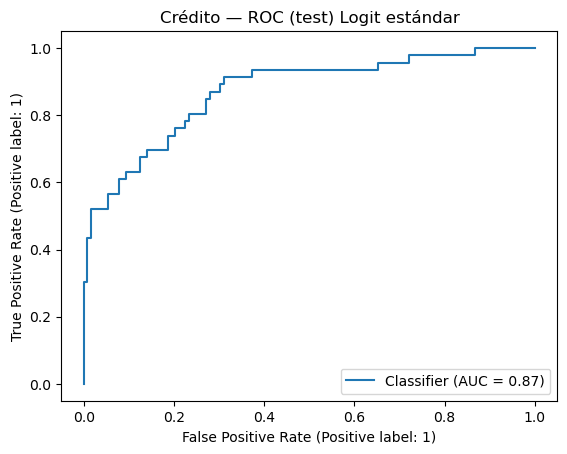

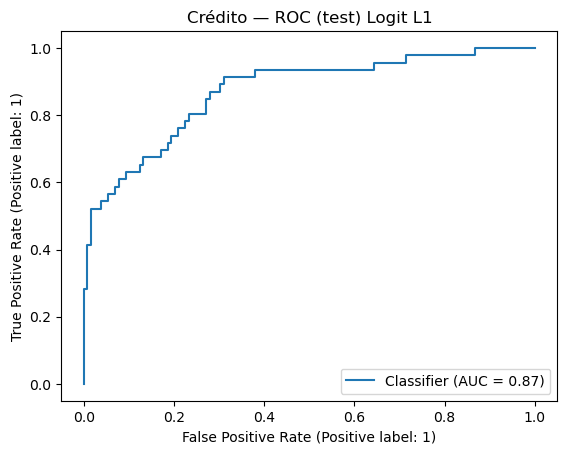

Variables seleccionadas (L1): ['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt', 'othdebt']


In [109]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_te, prob_te_std)
plt.title("Crédito — ROC (test) Logit estándar")
plt.show()

RocCurveDisplay.from_predictions(y_te, prob_te_l1)
plt.title("Crédito — ROC (test) Logit L1")
plt.show()

# Variables con coeficiente distinto de 0 en L1
coefs = logit_l1.named_steps["logit"].coef_[0]
selected_vars = [c for c, v in zip(X.columns, coefs) if abs(v) > 1e-8]
print("Variables seleccionadas (L1):", selected_vars)


Nuevo cliente + gráficos

Nuevo cliente -> Prob. 'default' (negado): 0.0142  | Decisión (>=0.5): 0


C:\Users\gary_\AppData\Local\Temp\ipykernel_87916\1003750983.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  prob_negado = float(logit_l1.predict_proba(nuevo)[:,1])


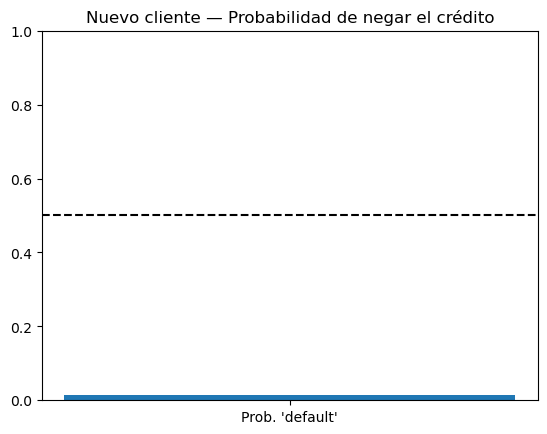

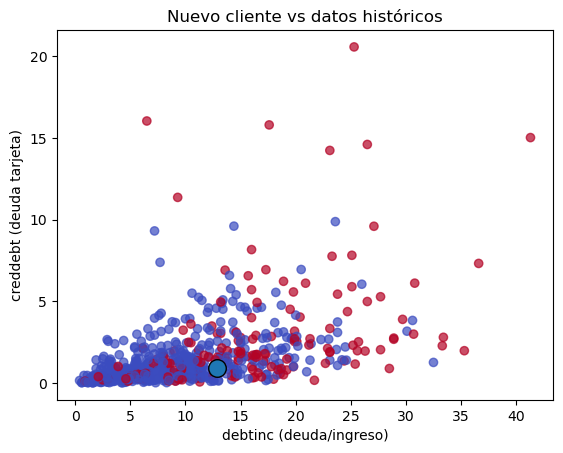

In [110]:
nuevo = pd.DataFrame([{
    "age": 37,
    "ed": 1,
    "employ": 20,
    "address": 13,
    "income": 41,
    "debtinc": 12.9,
    "creddebt": 0.9,
    "othdebt": 4.49
}])
# Asegurar todas las columnas:
for c in X.columns:
    if c not in nuevo.columns:
        nuevo[c] = 0
nuevo = nuevo[X.columns]

prob_negado = float(logit_l1.predict_proba(nuevo)[:,1])
pred_negado = int(prob_negado >= 0.5)
print(f"Nuevo cliente -> Prob. 'default' (negado): {prob_negado:.4f}  | Decisión (>=0.5): {pred_negado}")

# Barra de probabilidad
plt.figure()
plt.bar(["Prob. 'default'"], [prob_negado])
plt.ylim(0,1)
plt.axhline(0.5, linestyle="--", color="black")
plt.title("Nuevo cliente — Probabilidad de negar el crédito")
plt.show()

# Posición frente al conjunto (ejemplo 2D)
plt.figure()
plt.scatter(credit["debtinc"], credit["creddebt"], c=credit["default"], cmap="coolwarm", alpha=0.7)
plt.scatter([nuevo["debtinc"].iloc[0]], [nuevo["creddebt"].iloc[0]], s=160, edgecolor="black")
plt.xlabel("debtinc (deuda/ingreso)")
plt.ylabel("creddebt (deuda tarjeta)")
plt.title("Nuevo cliente vs datos históricos")
plt.show()
